# Priorizar hipotesis, análisis de test A/B
## Introducción

Se han recopilado datos una lista de hipotesis de una tienda en linea. Se pide priorizar esta lista de hipotesis que pueden ayudar a aumentar las ganancias. Además se pide lanzar un test A/B y analizar los resultados.

Este proyecto se dividirá en dos partes, la primera se priorizará una lista de hipótesis recolectadas en el dataset hypotheses, utilizando los frameworks ICE y RICE.

La segunda parte es el test A/B, se trabajará con los datasets orders y visitors. Al final basado en los resultados, se debe tomar una desición de que hacer con el test A/B. Las posibles desiciones son las siguientes:

a- Parar la prueba, consideara uno de los grupos como lider

b- Parar la prueba, porqué los grupos son iguales

c- Continuar la prueba.

**Tabla de contenido**

1.1 Priorizar la hipótesis

1.1.1 Carga de datos

1.1.2 Cálculo de ICE

1.1.3 Cálculo de RICE

1.2 Test A/B

1.2.1 Carga de datasets orders y visitors

1.2.2 Preprocesamiento de datos

1.2.3 Cálculo de ingreso por grupo

1.2.4 Gráfico de ingresos acumulados

1.2.5 Gráfico de pedido promedio acumulado por grupo

1.2.6 Gráfico de diferencia relativa en el tamaño de pedido

1.2.7 Cálculo de la tasa de conversión

1.2.8 Gráfico de la tasa de conversión

1.2.9 Cálculo de pedido por usuario

1.2.10 Cálculo de percentiles 95 y 99 para ordenes

1.2.11 Cálculo de percentiles 95 y 99 para pedidos

1.2.12 Cálculo de significación estadistica de la diferencia de conversión de datos en bruto

1.2.13 Calculo de significación estadistica de la diferencia de tamaño promedio de pedido

1.2.14 Cálculo de la significación estadistica de la diferencia para la conversión y para el tamaño promedio con los datos limpios

1.3 Conclusiones

### Priorizar Hipótesis

En esta sección se realizará la priorización de hipótesis utilizando los frameworks RICE y ICE, para observar como cambia la priorización en cada uno de ellos.

In [1]:
#Carga de Librerias 
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

#### Carga de datos

In [2]:
hypotheses= pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#Cambiando los titulos de las columnas
hypotheses.rename(str.lower, axis='columns', inplace=True)
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


#### Cálculo de ICE

In [5]:
#Cálculo de ICE
hypotheses['ICE']=(hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


#### Calculo de RICE

In [6]:
hypotheses_RICE=pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses_RICE.rename(str.lower, axis='columns', inplace=True)
hypotheses_RICE

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [7]:
#Calculo de RICE
hypotheses_RICE['RICE']=(hypotheses_RICE['reach']*hypotheses_RICE['impact']*hypotheses_RICE['confidence'])/hypotheses_RICE['effort']
hypotheses_RICE[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


En ambos métodos varian las puntuaciones de las hipótesis, las que se mantienen dentro del top 3 en ambos cálculos son las hipótesis 0 y 7, para el método ICE estas aparecen en las posiciones 2 y 3, y para el RICE aparecen en las posiciones 3 y 1 respectivamente. Estas se puede observar tienen un esfurzo, dentro de la escala 1-10, con un valor moderado lo que permite que se mantengan en las posiciones de arriba. Al contrario la hipótesis con indice 1, tiene un esfuerzo de 10 puntos y un alcance de 2, lo que hace que en ambos cálculos este en posiciones bajas en la tabla.

### Análisis de test A/B

#### Carga de datasets orders y visitors

In [8]:
orders= pd.read_csv('/datasets/orders_us.csv')

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [11]:
visitors=pd.read_csv('/datasets/visits_us.csv')

In [12]:
visitors.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#### Preprocesamiento de datos

In [14]:
#Buscando NAN 
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
#Comprobando valores duplicados
orders.duplicated().sum()

0

In [16]:
#Trabajando con los datos de la columna date
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [17]:
#Buscando NAN en visitors
visitors.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [18]:
#Buscando duplicados
visitors.duplicated().sum()

0

In [19]:
#Trabajando con los datos de la columna date en el dataset visitors
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
#A continuación se limpiará el dataset orders de los visitantes que esten en los grupos A y B
#Se realizará un filtro
orders_group=orders.groupby('visitorId')['group'].nunique().reset_index()

#orders_clean=orders[orders['visitorId'].isin(orders_group['group']<2['userId'])]

orders_group.columns=['visitorId', 'number_of_group']

orders_group

,visitorId,number_of_group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [21]:
orders_multiple_group=orders_group[orders_group['number_of_group']>1]

In [22]:
clean_orders=orders[~orders['visitorId'].isin(orders_multiple_group['visitorId'])]
clean_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


#### Cálculo de ingreso acumulado por grupo

In [23]:
#Calculo del ingreso acumulado por grupo
#Se creará la matriz de fecha grupo con el dataset orders
datesGroups = clean_orders[['date','group']].drop_duplicates() 

In [24]:
#Se creará el dataset orders_aggregated utilizando el dataset orders
orders_aggregated = datesGroups.apply(
    lambda x: clean_orders[
        np.logical_and(
            clean_orders['date'] <= x['date'], 
            clean_orders['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'transactionId' : pd.Series.nunique, 
            'visitorId' : pd.Series.nunique, 
            'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [25]:
## CODIGO REVISOR: EJEMPLO DE FORMATO
#Se creará el dataset orders_aggregated utilizando el dataset orders
#orders_aggregated = datesGroups.apply(
  #  lambda x: orders[
   #     np.logical_and(
    #        orders['date'] <= x['date'], 
     #       orders['group'] == x['group']
     #   )
  #  ].agg(
  #      {
   #         'date' : 'max', 
   #         'group' : 'max', 
   #         'transactionId' : pd.Series.nunique, 
   #         'visitorId' : pd.Series.nunique, 
   #         'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [26]:
#Se creará el dataset visitor_aggregate utilizando el dataset visitors
visitors_aggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], 
            visitors['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [27]:
#A continuación se funcionarán las dos tablas anteriores y se guardará con el nombre cumulative_data
cumulative_data=orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns=['date', 'group', 'transactions', 'visitors', 'revenue', 'visits']
cumulative_data.head()


,date,group,transactions,visitors,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [28]:
cumulative_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          62 non-null     datetime64[ns]
 1   group         62 non-null     object        
 2   transactions  62 non-null     int64         
 3   visitors      62 non-null     int64         
 4   revenue       62 non-null     float64       
 5   visits        62 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.4+ KB


#### Trazado de grafico de ingresos acumulados

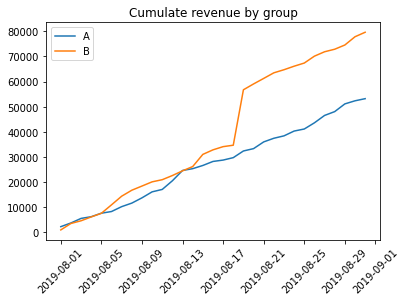

In [29]:
#Ahora se creará el gráfico de ingresos acumulados por grupo, se crearán dos DataFrames con filtros para A y B
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulative_revenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'transactions']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulative_revenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'transactions']]

# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.title('Cumulate revenue by group')
plt.legend() 
 

Se puede observar en el gráfico que alcomienzo de la prueba las ganancias acumuladas estaban muy similares, siendo el grupo A el que mostraba levemente mayor ganancia que el grupo B, pero a partir del 17-08-2019 las ganancias del grupo B, comenzaron a aumentar de forma más rápida que los del grupo A, aunque sigue creciendo lo hace de forma menor en el mismo periodo de tiempo. Lo que indica que la prueba esta teniendo resultados positivos en lo que a ganancias se refiere.

#### Trazado de gráfica del pedido promedio acumulado por grupo

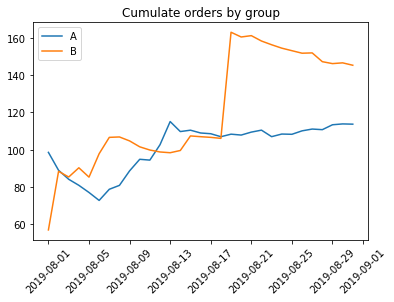

In [30]:
#Representación gráfica del pedido promedio acumulado por grupo
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['transactions'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['transactions'], label='B')
plt.xticks(rotation=45)
plt.title('Cumulate orders by group')

plt.legend() 

Se puede observar que al inicio de la prueba hay mucha fluctuación en ambos grupos.El grupo A presentaba mejor numero de ordenes acumuladas que en el grupo B. En el grupo B se observa un pico hasta los 160, puede ser causado por valores de compras muy altas. Hacia el final de la prueba se comienza a observar estabilidad entre los grupos.

#### Trazado de gráfico de la diferencia relativa

In [31]:
#Gráfico de la diferencia relativa
#1 Se van a unir los DataFrames cumulative_revenueA y cumulative_revenueB
merge_cumulative=cumulative_revenueA.merge(cumulative_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merge_cumulative

,date,revenueA,transactionsA,revenueB,transactionsB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89
5,2019-08-06,8292.0,114,10957.1,112
6,2019-08-07,10234.0,130,14392.7,135
7,2019-08-08,11638.8,144,16772.6,157
8,2019-08-09,13734.0,155,18428.8,176
9,2019-08-10,16121.5,170,20103.6,198


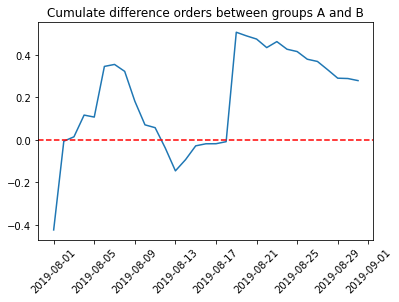

In [32]:
#2 Trazar el gráfico de de difrencia relativa del tamaño de pedido
plt.plot(merge_cumulative['date'], (merge_cumulative['revenueB']/merge_cumulative['transactionsB'])/(merge_cumulative['revenueA']/merge_cumulative['transactionsA'])-1)
plt.xticks(rotation=45)
plt.title('Cumulate difference orders between groups A and B')
# agregar el eje X
plt.axhline(y=0, color='red', linestyle='--') 

Se puede observar en el gráfico que hay muchos valores picos, esto puede ser causado por valores atipicos o por valores de compra muy elevados.

#### Cálculo de la tasa de conversión

In [33]:
#Calculo de la conversión en cada grupo
cumulative_data['convertion']=cumulative_data['transactions']/cumulative_data['visits']

#Se realizan dos dataframes separados por el grupo
#Grupo A
convertion_group_A=cumulative_data[cumulative_data['group']=='A']

#Grupo B
convertion_group_B=cumulative_data[cumulative_data['group']=='B']

In [34]:
convertion_group_A

,date,group,transactions,visitors,revenue,visits,convertion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837
10,2019-08-06,A,114,104,8292.0,3985,0.028607
12,2019-08-07,A,130,120,10234.0,4629,0.028084
14,2019-08-08,A,144,133,11638.8,5239,0.027486
16,2019-08-09,A,155,143,13734.0,5856,0.026469
18,2019-08-10,A,170,158,16121.5,6262,0.027148


In [35]:
convertion_group_B

,date,group,transactions,visitors,revenue,visits,convertion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134
11,2019-08-06,B,112,109,10957.1,3935,0.028463
13,2019-08-07,B,135,132,14392.7,4644,0.029070
15,2019-08-08,B,157,154,16772.6,5298,0.029634
17,2019-08-09,B,176,173,18428.8,5908,0.029790
19,2019-08-10,B,198,195,20103.6,6277,0.031544


In [36]:
#Buscando los valores maximos y minimos de los ejes
print(cumulative_data['date'].min())
print(cumulative_data['date'].max())
print(cumulative_data['convertion'].min())
print(cumulative_data['convertion'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00
0.023842917251051893
0.03577235772357724


#### Trazado de grafico de la tasa de conversión por grupos

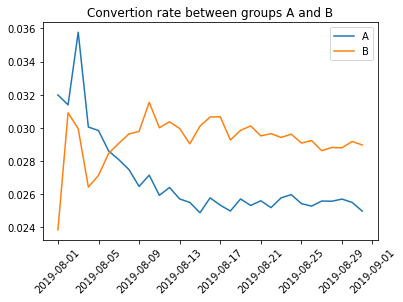

In [37]:
#Trazar el gráfico de la tasa de conversión por grupos

plt.plot(convertion_group_A['date'], convertion_group_A['convertion'], label='A')
plt.plot(convertion_group_B['date'], convertion_group_B['convertion'], label='B')
plt.xticks(rotation=45)
plt.title('Convertion rate between groups A and B')
plt.legend()


En la gráfica se observa inestabilidad en ambos grupos a lo largo de la prueba. A tempranas fechas de la prueba se nota un punto de inflexión donde la tasa de conversión del grupo A, disminuye y la del grupo B aumenta. A continuación se trazará la diferencia relativa entre las conversiones.

In [38]:
cumulative_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          62 non-null     datetime64[ns]
 1   group         62 non-null     object        
 2   transactions  62 non-null     int64         
 3   visitors      62 non-null     int64         
 4   revenue       62 non-null     float64       
 5   visits        62 non-null     int64         
 6   convertion    62 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 3.9+ KB


In [45]:
cumulative_convertionA = cumulative_data[cumulative_data['group']=='A'][['date','transactions','visitors','revenue', 'visits', 'convertion']]
cumulative_convertionA.head()

,date,transactions,visitors,revenue,visits,convertion
0,2019-08-01,23,19,2266.6,719,0.031989
2,2019-08-02,42,36,3734.9,1338,0.031390
4,2019-08-03,66,60,5550.1,1845,0.035772
6,2019-08-04,77,71,6225.6,2562,0.030055
8,2019-08-05,99,92,7623.6,3318,0.029837


In [46]:
cumulative_convertionB = cumulative_data[cumulative_data['group']=='B'][['date','transactions','visitors','revenue', 'visits','convertion']]
cumulative_convertionB.head()

,date,transactions,visitors,revenue,visits,convertion
1,2019-08-01,17,17,967.2,713,0.023843
3,2019-08-02,40,39,3535.3,1294,0.030912
5,2019-08-03,54,53,4606.9,1803,0.029950
7,2019-08-04,68,66,6138.5,2573,0.026428
9,2019-08-05,89,87,7587.8,3280,0.027134


In [41]:
merge_cumulative_convertion=cumulative_convertionA.merge(cumulative_convertionB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merge_cumulative_convertion.head()

,date,transactionsA,visitorsA,revenueA,visitsA,convertionA,transactionsB,visitorsB,revenueB,visitsB,convertionB
0,2019-08-01,23,19,2266.6,719,0.031989,17,17,967.2,713,0.023843
1,2019-08-02,42,36,3734.9,1338,0.031390,40,39,3535.3,1294,0.030912
2,2019-08-03,66,60,5550.1,1845,0.035772,54,53,4606.9,1803,0.029950
3,2019-08-04,77,71,6225.6,2562,0.030055,68,66,6138.5,2573,0.026428
4,2019-08-05,99,92,7623.6,3318,0.029837,89,87,7587.8,3280,0.027134


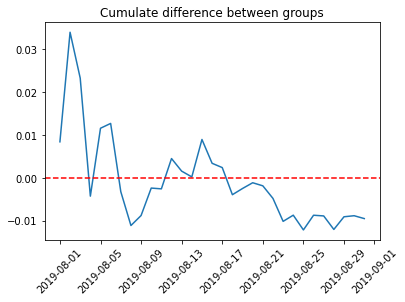

In [48]:
#Trazado de la diferencia relativa de la conversión entre grupos
plt.plot(merge_cumulative_convertion['date'], (merge_cumulative_convertion['convertionB']/merge_cumulative_convertion['transactionsB'])/(merge_cumulative_convertion['convertionA']/merge_cumulative_convertion['transactionsA'])-1)
plt.xticks(rotation=45)
plt.title('Cumulate difference between groups')
# agregar el eje X
plt.axhline(y=0, color='red', linestyle='--') 

La diferencia relativa de conversión termina siendo mejor para el grupo A que para el B

#### Cálculo de pedido por usuario

In [53]:
#Cálculo del número de pedidos por uusarios
orders_by_users=(clean_orders.drop(['date', 'revenue', 'group'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
orders_by_users.columns=['visitorId', 'transaction']

In [54]:
orders_by_users

,visitorId,transaction
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


In [57]:
orders_by_users['transaction'].value_counts()

1    937
2     29
3      7
Name: transaction, dtype: int64

#### Cálculo de percentiles 95 y 99 para las ordenes

In [59]:
#Cálculo de percentiles 95 y 99
np.percentile(orders_by_users['transaction'], [95,99])

array([1., 2.])

Estudiando los percentiles los valores estan de la siguiente forma, no más del 5% de los valores estan por arriba de 1, (percentil 95) y no más del 1% de los valores (percnetil 99) están por arriba de 2. Por lo tanto todo pedido mayor a 1 puede ser catalogado como anomalo.

Text(0.5, 1.0, 'Number of orders by users')

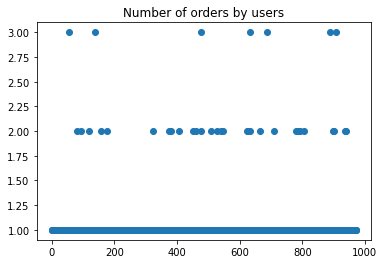

In [60]:
x_values=pd.Series(range(0,len(orders_by_users['transaction'])))
plt.scatter(x_values, orders_by_users['transaction'])
plt.title('Number of orders by users')

El gráfico muestra practicamente tres valores de numeros de pedidos, podemos considerar que más de dos pedidos por usuario es un valor anomalo. Solo hay 7 usuarios con tres pedidos realizados.

Text(0.5, 1.0, 'Revenue range distribution')

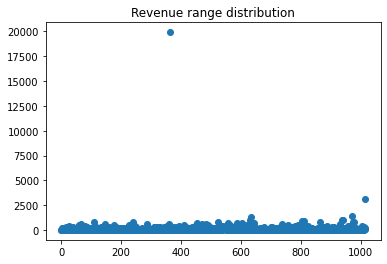

In [62]:
#Trazar gráfico de dispersión con los precios de los pedidos
x_values= pd.Series(range(0,len(clean_orders['revenue'])))
plt.scatter(x_values, clean_orders['revenue'])
plt.title('Revenue range distribution')

Hay claramente un valor anomalo en los precios de los pedidos que es de 20000, el rango de precios de los pedidos está entre 0 y 2500.

#### Cálculo de precentiles 95 y 99 para el precio de los pedidos

In [64]:
#Cálculo de percentiles 95 y 99 para el precio de los pedidos
np.percentile(clean_orders['revenue'], [95,99])

array([414.275, 830.3  ])

Calculando los percentiles 95 y 99, tenemos que el 5% del precio de los pedidos está por arriba de 414.275 y que el 1% de los precios de los pedidos está por arriba de 830.3, por lo tanto los valores anomalos se pueden considerar aquellos mayores a 650.

#### Cálclulo de la significancia estadistica de la diferencia de conversión entre los datos en bruto

In [66]:
#Calculo de la significancia estadistica de la diferencia de conversión entre los datos en bruto

#Creamos la variable orders_by_usersA.
orders_by_usersA=clean_orders[clean_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_by_usersA.columns=['visitorId', 'transaction']

#Creamos la variable orders_by_usersB
orders_by_usersB=clean_orders[clean_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_by_usersB.columns=['visitorId', 'transaction']


In [67]:
#Declaración de variables sampelA y sampleB
sampleA=  pd.concat([orders_by_usersA['transaction'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum()-len(orders_by_usersA['transaction'])),name='transaction')], axis=0)
                                                              
sampleB=  pd.concat([orders_by_usersB['transaction'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum()-len(orders_by_usersB['transaction'])),name='transaction')], axis=0)

In [68]:
#Calculando la significacia estadistica
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.011
0.160


Con el valor de significacia establecido en 0.05, en la prueba se obtuvo un valor de p de 0.011, que es menor que alpha, así que podemos rechazar la hipótesis nula, hay una diferencia estadísticamente significativa en la conversión entre los grupos.

El segundo valor indica que el grupo B obtuvo una conversión del 16% por encima del grupo A.

#### Cálculo de la significancia estadistica de la diferencia en el tamaño promedio de pedido entre grupos

In [69]:
#Significancia estadistica de la diferencia en el tamaño promedio de pedido entre grupos
print('{0:.3f}'.format(stats.mannwhitneyu(clean_orders[clean_orders['group']=='A']['revenue'], clean_orders[clean_orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(clean_orders[clean_orders['group']=='B']['revenue'].mean()/clean_orders[clean_orders['group']=='A']['revenue'].mean()-1)) 

0.862
0.278


El valor de p es 0.862, que es mayor al valor de significación, por lo cual no se puede rechazar la hipótesis nula, por lo que no habria diferencia estadistica entre los grupos en el tamaño promedio de los pedidos

El valor de 0.278, indica que el tamaño del pedido medio es mayor 27.8% del grupo B, es mayor que el del grupo A.

#### Cálculo de la significacion estadistica de la diferencia para la conversión y para el tamaño promedio de pedido con los datos limpios

In [75]:
#Limpieza de usuarios anomalos, a los usuarios que tienen compras por valores mayores a 650 y con pedidos mayores a 1
#usersWithManyOrders= usuarios con ordenes mayores a 1
#usersWithExpensiveOrders= usuarios con ordenes con valores mayores a 650

usersWithManyOrders = pd.concat(
    [
        orders_by_usersA[orders_by_usersA['transaction'] > 1]['visitorId'], 
        orders_by_usersB[orders_by_usersB['transaction'] > 1]['visitorId']], 
    axis = 0)## COMENTARIO REVISOR: EDITE ESTE ORDEN
usersWithExpensiveOrders = clean_orders[clean_orders['revenue'] > 650]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
33      249864742
684     358944393
36      366673373
648     382846391
Name: visitorId, dtype: int64
(56,)


In [72]:
#Filtrando el grupo A
sample_A_filtered=pd.concat([orders_by_usersA[np.logical_not(orders_by_usersA['visitorId'].isin(abnormalUsers))]['transaction'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(orders_by_usersA['transaction'])),name='transaction')],axis=0)

#Filtrando el grupo B
sample_B_filtered=pd.concat([orders_by_usersB[np.logical_not(orders_by_usersB['visitorId'].isin(abnormalUsers))]['transaction'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(orders_by_usersB['transaction'])),name='transaction')],axis=0)

In [73]:
#Recalculando la significancia estadistica de la diferencia en la conversión entre grupos, con los datos filtrados

print("{0:.3f}".format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
print("{0:.3f}".format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

0.005
0.203


Al eliminar los valores anormales en los datos filtrados y repetir la prueba Mann-Whitney-U el valor de p es menor, a alpha podemos rechazar la hipótesis nula y por ende concluir que hay una diferencia estadísticamente significativa en la conversión entre los grupos. La conversión para el grupo B es mayor que para el grupo A  en 20.3%, un poco mayor que para la primera prueba,

In [74]:
#Recalculando la significancia estadistica de la diferencia del tamaño de pedido entre los grupos A y B con los datos filtrados
print('{0:.3f}'.format(stats.mannwhitneyu(
    clean_orders[np.logical_and(
        clean_orders['group']=='A',
        np.logical_not(clean_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    clean_orders[np.logical_and(
        clean_orders['group']=='B',
        np.logical_not(clean_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    clean_orders[np.logical_and(clean_orders['group']=='B',np.logical_not(clean_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    clean_orders[np.logical_and(
        clean_orders['group']=='A',
        np.logical_not(clean_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.716
0.097


En este resultado p es mucho mayor que alpha, por lo que no se puede rechazar la hipótesis nula nuevamente. Bajo el criterio aplicado para eliminar lo valores anomalos, el tamaño de los pedidos para el grupo B resulta mayor que el del grupo A, pero solamente por un 9.7%, esto indica que los valores anormales que contenia el dataset influian en los tamaños de pedido promedio.

### Conclusión

Se ha relizado un test A/B, trabajando con datasets de ordenes y visitantes, se aplicaron filtros para eliminar usuarios que estaban en ambos grupos. Se trazaron graficas comparativas pra observar el comportamiento de cada grupo en conversiones ytamaño de pedidos. Se calcularon las significancias estadisticas de la diferencia en la conversión y tamaño promedio de pedido. En todas ellas el comportamiento del grupo B fue mejor respecto al grupo A. 

Basado en lo anteriormente dicho **se puede tomar la decisión de detener la prueba y tomar al grupo B como el grupo lider por el comprotamiento presentado durante la prueba.**